In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import plotly.graph_objects as go

In [35]:
#reading the file
data=pd.read_csv('C:/Users/student/Desktop/datasets/imdb_top_2000_movies.csv',encoding='ISO-8859-1')
print(data)

                 Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0             The Godfather         1972       175          9.2      100.0   
1     The Godfather Part II         1974       202          9.0       90.0   
2           Ordinary People         1980       124          7.7       86.0   
3        Lawrence of Arabia         1962       218          8.3      100.0   
4                Straw Dogs         1971       113          7.4       73.0   
...                     ...          ...       ...          ...        ...   
1995     The Young Victoria         2009       105          7.2       64.0   
1996            Tooth Fairy       I 2010       101          5.0       36.0   
1997         The Informant!         2009       108          6.5       66.0   
1998        Youth in Revolt         2009        90          6.4       63.0   
1999             Quarantine         2008        89          6.0       53.0   

          Votes                        Genre              Direc

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [37]:
#Top 10 most rated movies by IMDB

# Sort the movies by descending IMDb rating and select the top ones
top_rated_movies = data.sort_values(by='IMDB Rating', ascending=False).head(10)

# Print the top-rated movies
print("Top-Rated Movies:")
print(top_rated_movies[['Movie Name', 'IMDB Rating']])


Top-Rated Movies:
                                             Movie Name  IMDB Rating
506                            The Shawshank Redemption          9.3
0                                         The Godfather          9.2
1019      The Lord of the Rings: The Return of the King          9.0
1                                 The Godfather Part II          9.0
513                                    Schindler's List          9.0
36                                         12 Angry Men          9.0
1508                                    The Dark Knight          9.0
1018  The Lord of the Rings: The Fellowship of the Ring          8.9
580                                        Pulp Fiction          8.9
15                      Il buono, il brutto, il cattivo          8.8


In [38]:
plt.style.use('fivethirtyeight')

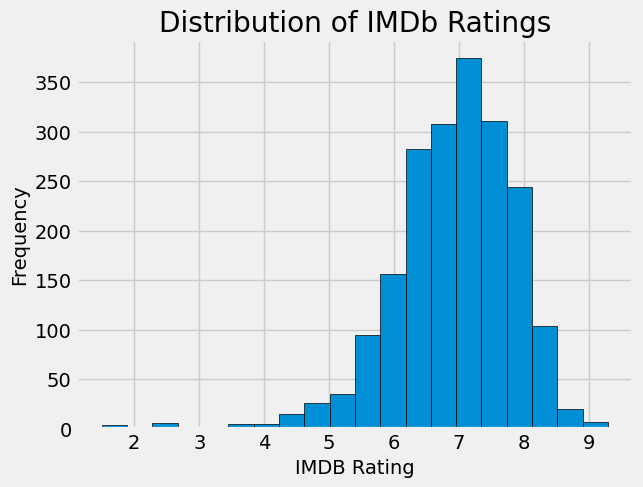

In [39]:
#Visualizing the trend of rating through matplotlib
# Plot a histogram of IMDb ratings to visualize the distribution
plt.hist(data['IMDB Rating'], bins=20,edgecolor='black')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

In [40]:
#Top 10 least rated movies by IMDB
# Sort the movies by descending IMDb rating and select the top ones
least_rated_movies = data.sort_values(by='IMDB Rating', ascending=False).tail(10)

# Print the least-rated movies
print(least_rated_movies[['Movie Name', 'IMDB Rating']])

                          Movie Name  IMDB Rating
978                Battlefield Earth          2.5
1977            Dragonball Evolution          2.5
1199                         Glitter          2.4
1452               Alone in the Dark          2.4
1727                      Epic Movie          2.4
1738                 Ãilgin Dersane          1.9
1931      Birdemic: Shock and Terror          1.7
1492      Keloglan Karaprens'e Karsi          1.6
1736  DÃ¼nyayi Kurtaran Adam'in Oglu          1.5
1737        Emret Komutanim: Sah Mat          1.5


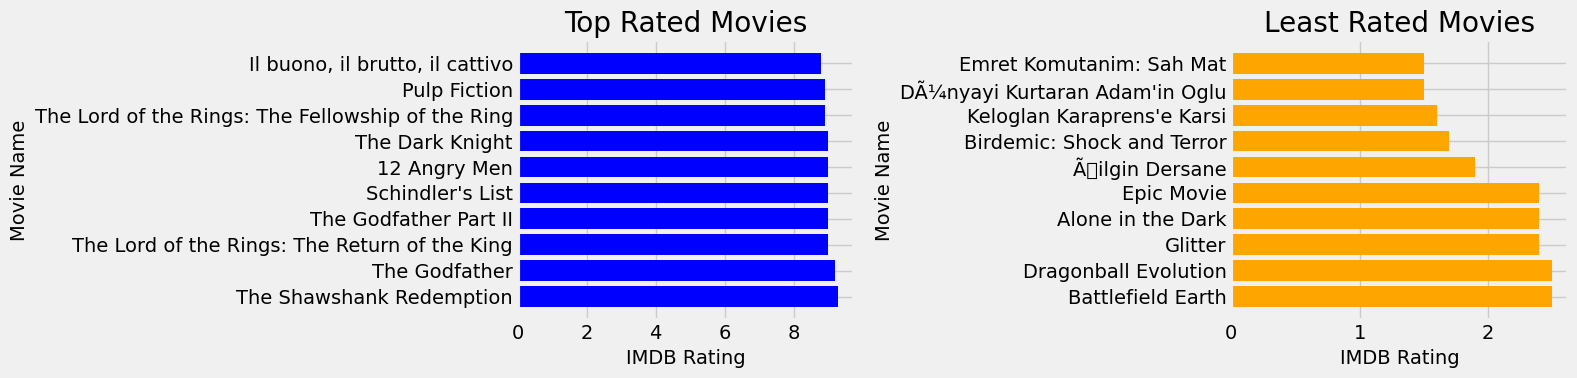

In [41]:
movie_namest = top_rated_movies['Movie Name'].tolist()
ratingst = top_rated_movies['IMDB Rating'].tolist()
movie_namesl = least_rated_movies['Movie Name'].tolist()
ratingsl = least_rated_movies['IMDB Rating'].tolist()

# Creating subplots for Column Chart and Horizontal Bar Chart
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Column Chart for top-rated movies
ax1.barh(movie_namest, ratingst, color='blue')
ax1.set_xlabel('IMDB Rating')
ax1.set_ylabel('Movie Name')
ax1.set_title('Top Rated Movies')
# Horizontal Bar Chart for least-rated movies
ax2.barh(movie_namesl, ratingsl, color='orange')
ax2.set_xlabel('IMDB Rating')
ax2.set_ylabel('Movie Name')
ax2.set_title('Least Rated Movies')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Most Popular Genres by Average IMDb Rating:
Genre
Adventure, Western               8.8
Animation, Drama, War            8.5
Documentary, Biography, Crime    8.5
Drama, Mystery, War              8.4
Drama, Film-Noir                 8.4
Name: IMDB Rating, dtype: float64


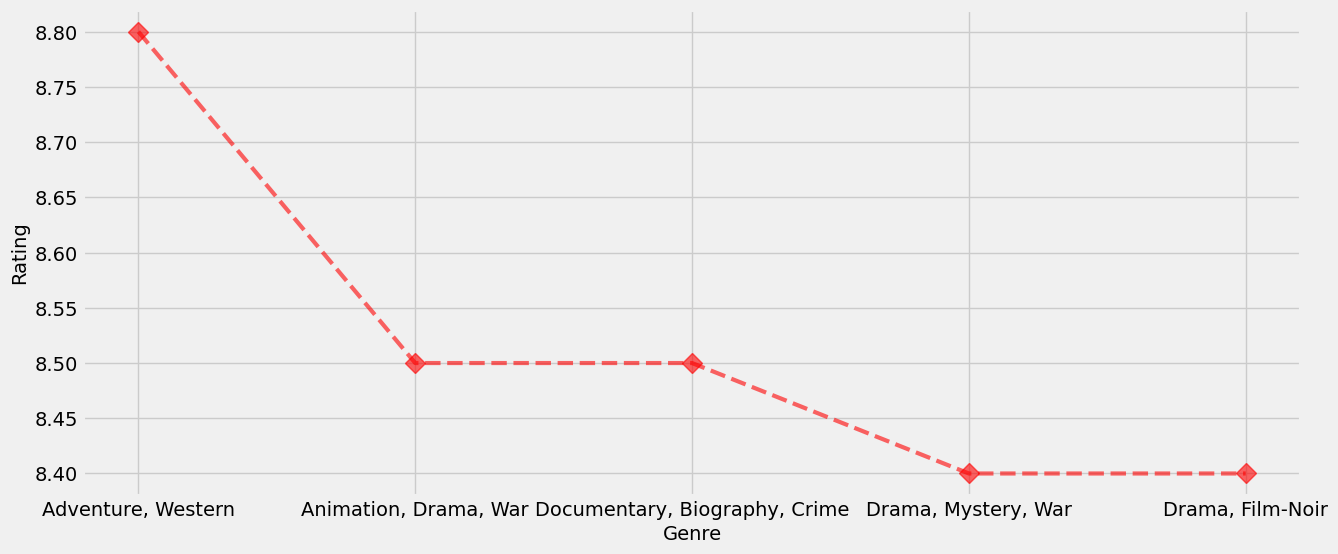

In [42]:
#Most popular genres

# Group the data by genre and calculate the average IMDb rating for each genre
genre_avg_ratings = data.groupby('Genre')['IMDB Rating'].mean()

# Sort genres by average rating to find the most popular genres
most_popular_genres = genre_avg_ratings.sort_values(ascending=False).head(5)
print("Most Popular Genres by Average IMDb Rating:")
print(most_popular_genres)
#visualising the data
plt.figure(figsize=(14,6))
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.plot(most_popular_genres,marker='D',c='r',ls='--',lw=3,ms=10,alpha=.6);

In [43]:
#Top 5 movies according to run time

# Sort the dataset based on 'Runtime' in descending order
top_runtime_movies = data.sort_values(by='Duration', ascending=False).head(5)

print("Top 5 Movies by Runtime:")
print(top_runtime_movies[['Movie Name', 'Duration']])

Top 5 Movies by Runtime:
                            Movie Name  Duration
552                         Gettysburg       271
656                             Hamlet       242
129                 Gone with the Wind       238
377        Once Upon a Time in America       229
921  Lagaan: Once Upon a Time in India       224


In [44]:
#Top 5 movies according to gross revenue

# Sort the dataset based on 'Gross' in descending order
top_grossing_movies = data.sort_values(by='Gross', ascending=False).head(5)

print("Top Grossing Movies:")
print(top_grossing_movies[['Movie Name','Release Year','Gross']])

Top Grossing Movies:
              Movie Name Release Year    Gross
676             Hercules         1997  $99.05M
1962          Date Night         2010  $98.71M
451     The Color Purple         1985  $98.47M
1592  Meet the Robinsons         2007  $97.82M
1782             Yes Man         2008  $97.69M


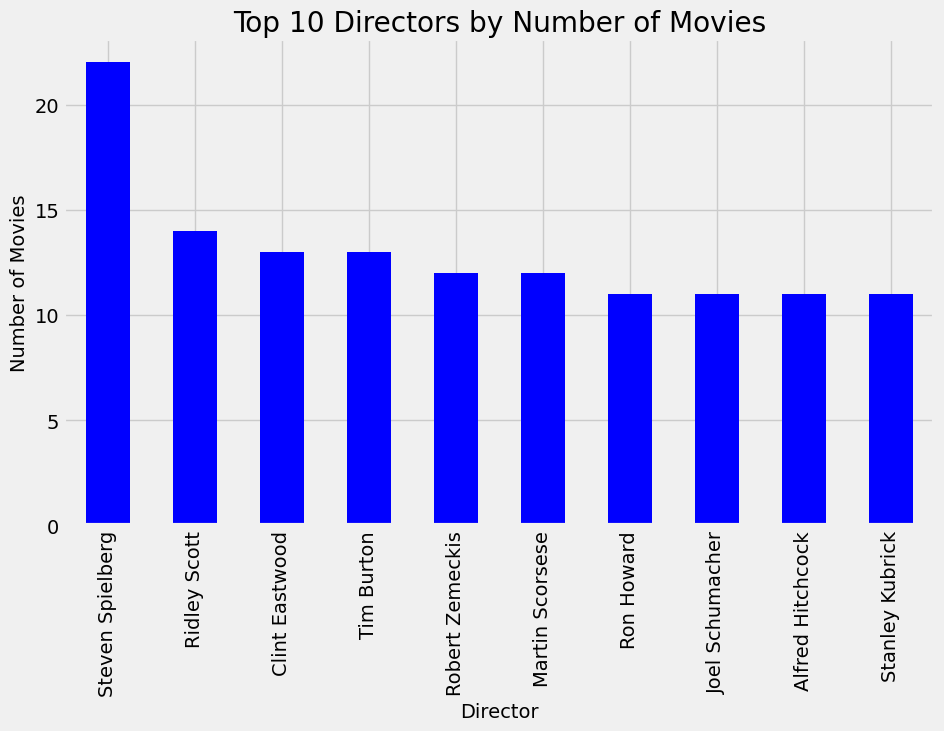

In [45]:
#Top 10 Directors by Number of Movies
plt.figure(figsize=(10, 6))

data['Director'].value_counts().head(10).plot(kind='bar',color='blue')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies');

Duration
50     7.70
60     7.20
64     7.80
68     8.20
69     7.45
       ... 
224    8.10
229    8.30
238    8.20
242    7.70
271    7.60
Name: IMDB Rating, Length: 131, dtype: float64


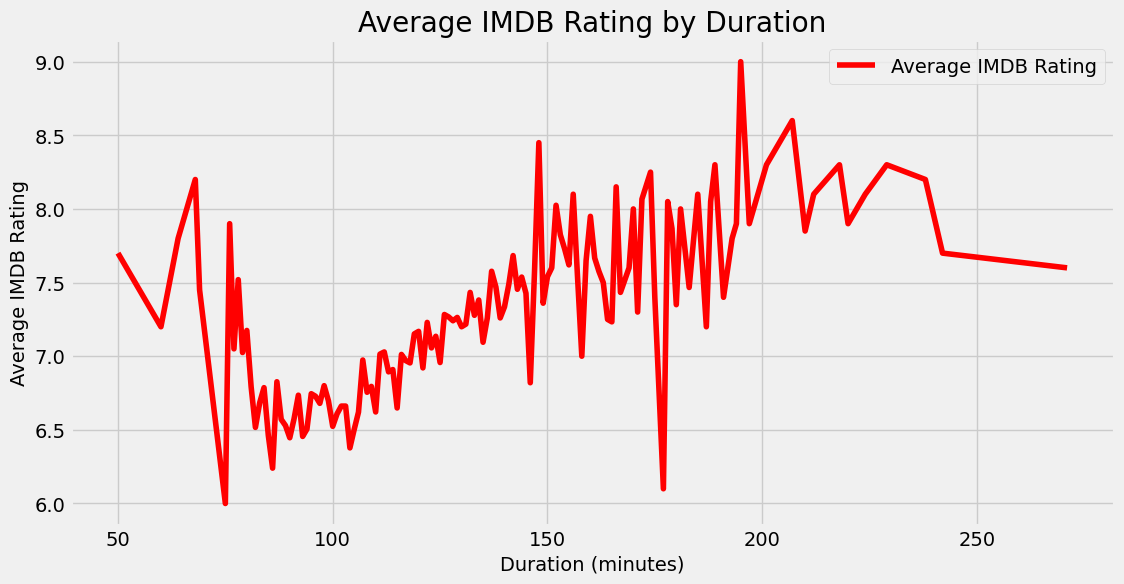

In [46]:
#Calculate average IMDB rating for different durations

duration_avg_rating = data.groupby('Duration')['IMDB Rating'].mean()

print(duration_avg_rating)

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(duration_avg_rating.index, duration_avg_rating, label='Average IMDB Rating', color='red')
plt.title('Average IMDB Rating by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average IMDB Rating')
plt.legend()
plt.show()

In [47]:
#Calculate the average Metascore rating for each genre
genre_avg_metascore = data.groupby('Genre')['Metascore'].mean()

print("Average Metascore Ratings by Genre:")
print(genre_avg_metascore)

Average Metascore Ratings by Genre:
Genre
Action, Adventure               66.000000
Action, Adventure, Biography    47.000000
Action, Adventure, Comedy       53.108696
Action, Adventure, Crime        41.428571
Action, Adventure, Drama        67.030303
                                  ...    
Mystery, Sci-Fi, Thriller       75.000000
Mystery, Thriller               61.666667
Sci-Fi, Thriller                54.500000
Thriller                        71.000000
Western                         75.500000
Name: Metascore, Length: 264, dtype: float64


In [48]:
plt.style.use('default')

Number of Actors in Top 5 Movies by IMDb Rating:
                                         Movie Name  Number of Actors
506                        The Shawshank Redemption                 1
0                                     The Godfather                 1
1019  The Lord of the Rings: The Return of the King                 1
1                             The Godfather Part II                 1
513                                Schindler's List                 1


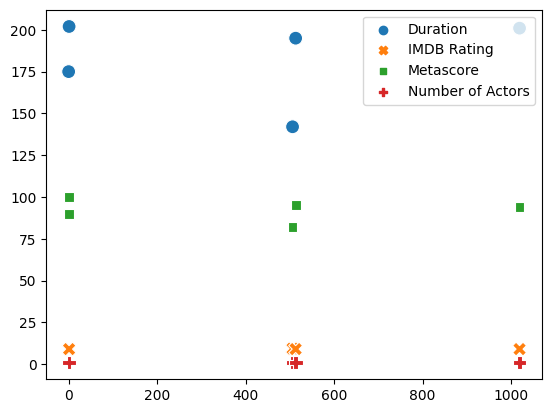

In [49]:
#To find the number of actors in the top 5 movies based on IMDb ratings
top_movies = data.sort_values(by='IMDB Rating', ascending=False).head(5)

# Split the 'Cast' column by comma to get a list of actors for each movie
top_movies['Number of Actors'] = top_movies['Cast'].str.split(',').apply(len)

print("Number of Actors in Top 5 Movies by IMDb Rating:")
print(top_movies[['Movie Name', 'Number of Actors']])

#using scatterplot to analyze the various aspects of top rated movies
sns.scatterplot(top_movies,s=100);

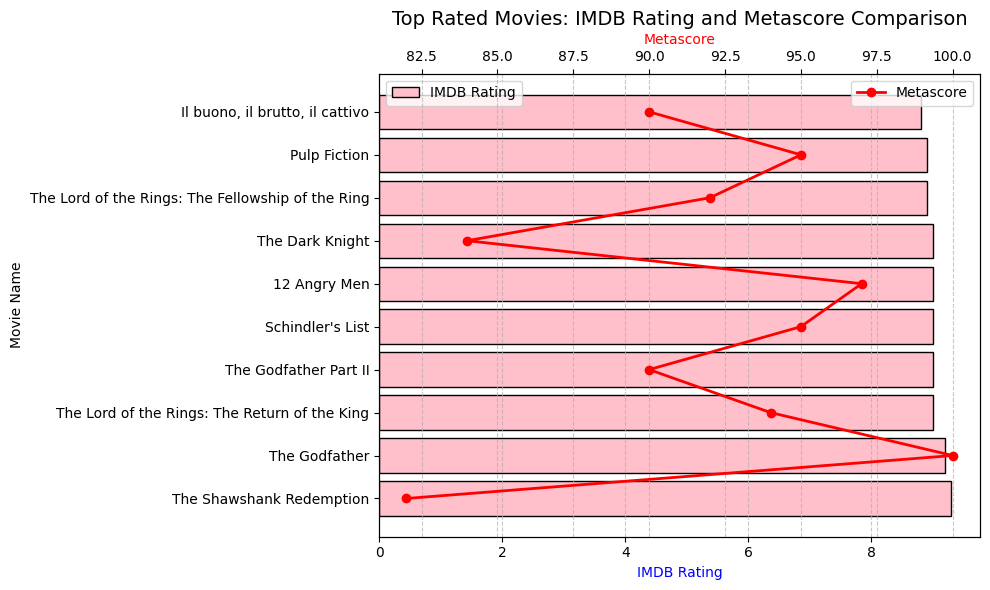

In [50]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the horizontal bar chart for IMDb ratings
ax1.barh(top_rated_movies['Movie Name'], top_rated_movies['IMDB Rating'], color='pink', edgecolor='black', label='IMDB Rating')
ax1.set_xlabel('IMDB Rating', color='blue')
ax1.set_ylabel('Movie Name')

# Create a second y-axis for the line plot (Metascore)
ax2 = ax1.twiny()
ax2.plot(top_rated_movies['Metascore'], top_rated_movies['Movie Name'], color='red', marker='o', linestyle='-', linewidth=2, label='Metascore')
ax2.set_xlabel('Metascore', color='red')

# Set title
ax1.set_title('Top Rated Movies: IMDB Rating and Metascore Comparison', fontsize=14)

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add gridlines
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax2.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()


In [51]:
plt.style.use('fivethirtyeight')

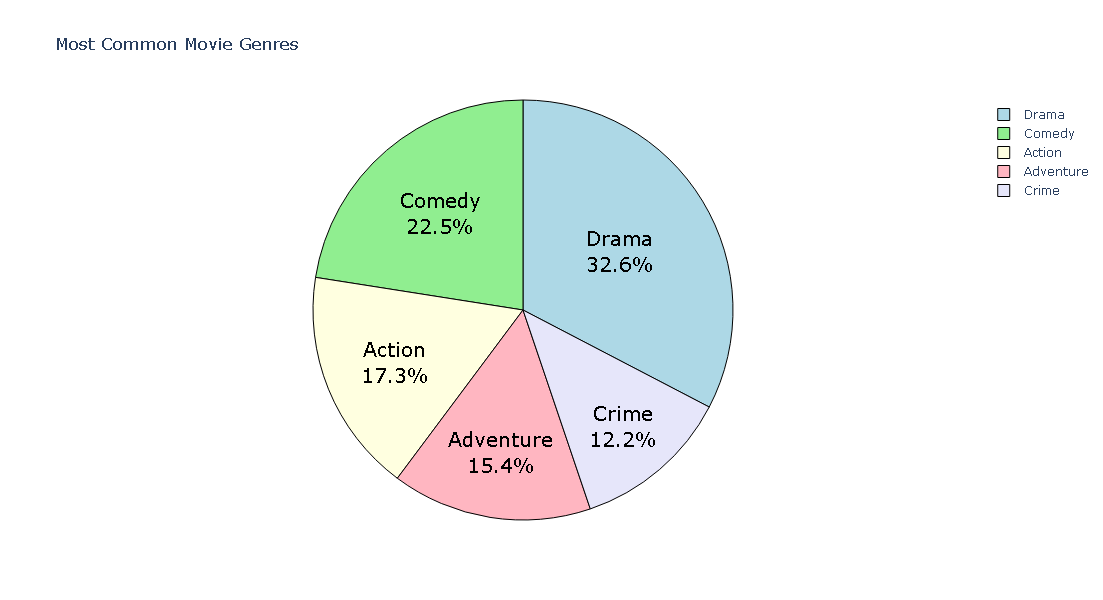

In [52]:
#To visualize the top 5 most common occuring genres
df = pd.DataFrame(data)
# Function to clean genre data and get counts
def clean_genres(df):
    split_genres = df['Genre'].str.split(', ')
    genres = [genre for sublist in split_genres for genre in sublist]
    return pd.Series(genres).value_counts()

colors = ['#ADD8E6', '#90EE90', '#FFFFE0', '#FFB6C1', '#E6E6FA']
text_color = '#000000'

genre_counts = clean_genres(df).head(5)
fig = go.Figure(data=[go.Pie(labels=genre_counts.index,
                              values=genre_counts,
                              hoverinfo='label+percent',
                              textinfo='label+percent',
                              textfont=dict(size=20, color=text_color),
                              marker=dict(colors=colors,
                                          line=dict(color='black', width=1.0),
                                          ),
                              )])

# Update layout for the chart
fig.update_layout(title='Most Common Movie Genres', showlegend=True, height=600, width=800)
fig.show()

In [71]:
data['Metascore'].mean()

61.04429390307452

In [64]:
data.isnull().sum()

Movie Name         0
Release Year       0
Duration           0
IMDB Rating        0
Metascore          0
Votes              0
Genre              0
Director           0
Cast               0
Gross           2000
dtype: int64

In [70]:
# Fill numerical columns with their mean values
data['Metascore'].fillna(data['Metascore'].mean(), inplace=True)

# Fill any other potential missing values with a placeholder, for example 'Unknown'
data.fillna('Unknown', inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64
